# **Forecasting Air Pollution Levels in Major Cities Using Deep Learning**

Dataset link: https://archive.ics.uci.edu/dataset/381/beijing+pm2.5+data

# Data loading

In [1]:
import pandas as pd

# Load the dataset
file_path = "PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(file_path)

# Show basic structure
print(df.head())
print(df.info())

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non

# Data Preprocessing

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load data
file_path = "PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(file_path)

# Create datetime index
df["datetime"] = pd.to_datetime(
    df[["year", "month", "day", "hour"]]
)
df = df.set_index("datetime")

# Drop incomplete date columns if not needed later
df = df.drop(columns=["No", "year", "month", "day", "hour"])

# Handle missing pm2.5 values
df["pm2.5"] = df["pm2.5"].interpolate(method="time")

# Encode wind direction
le = LabelEncoder()
df["cbwd"] = le.fit_transform(df["cbwd"])

# Fill remaining missing values if any
df = df.fillna(method="ffill").fillna(method="bfill")

# Smooth extreme noise in pm2.5 using rolling mean
df["pm2.5_smooth"] = df["pm2.5"].rolling(window=3, min_periods=1).mean()

# Show final structure
print(df.head())
print(df.info())

                     pm2.5  DEWP  TEMP    PRES  cbwd    Iws  Is  Ir  \
datetime                                                              
2010-01-01 00:00:00  129.0   -21 -11.0  1021.0     1   1.79   0   0   
2010-01-01 01:00:00  129.0   -21 -12.0  1020.0     1   4.92   0   0   
2010-01-01 02:00:00  129.0   -21 -11.0  1019.0     1   6.71   0   0   
2010-01-01 03:00:00  129.0   -21 -14.0  1019.0     1   9.84   0   0   
2010-01-01 04:00:00  129.0   -20 -12.0  1018.0     1  12.97   0   0   

                     pm2.5_smooth  
datetime                           
2010-01-01 00:00:00         129.0  
2010-01-01 01:00:00         129.0  
2010-01-01 02:00:00         129.0  
2010-01-01 03:00:00         129.0  
2010-01-01 04:00:00         129.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pm2.5         43

# Exploratory Data Analysis (EDA)

Shape: (43824, 9)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pm2.5         43824 non-null  float64
 1   DEWP          43824 non-null  int64  
 2   TEMP          43824 non-null  float64
 3   PRES          43824 non-null  float64
 4   cbwd          43824 non-null  int64  
 5   Iws           43824 non-null  float64
 6   Is            43824 non-null  int64  
 7   Ir            43824 non-null  int64  
 8   pm2.5_smooth  43824 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.3 MB
None
              pm2.5          DEWP          TEMP          PRES          cbwd  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.261809      1.817246     12.448521   1016.447654      1.663267   
std       90.944915     14.433440     12.198613     10.268698      0.93798

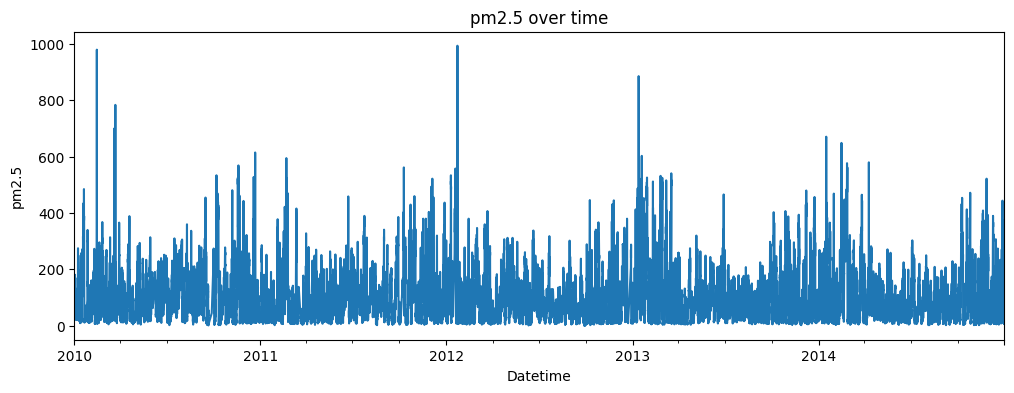

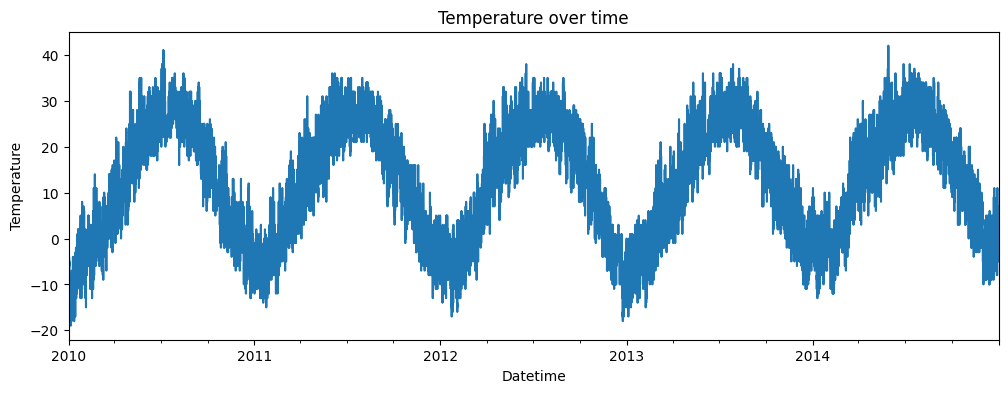

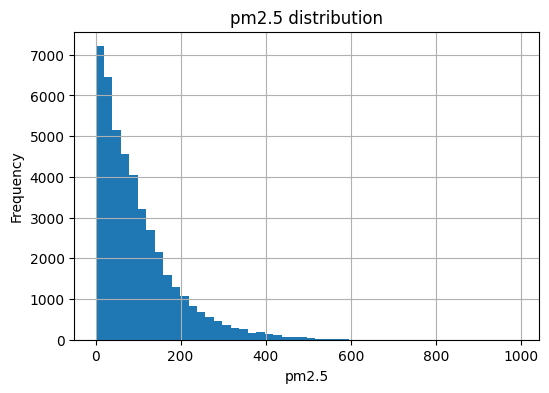

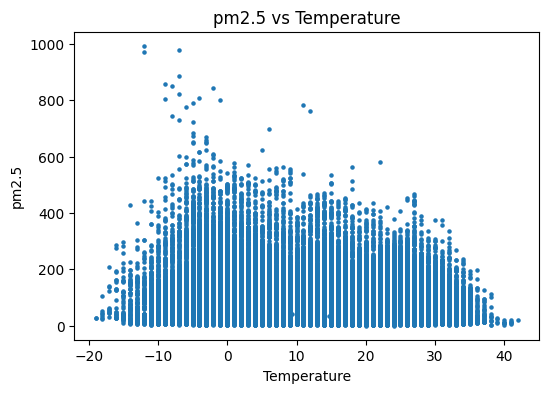

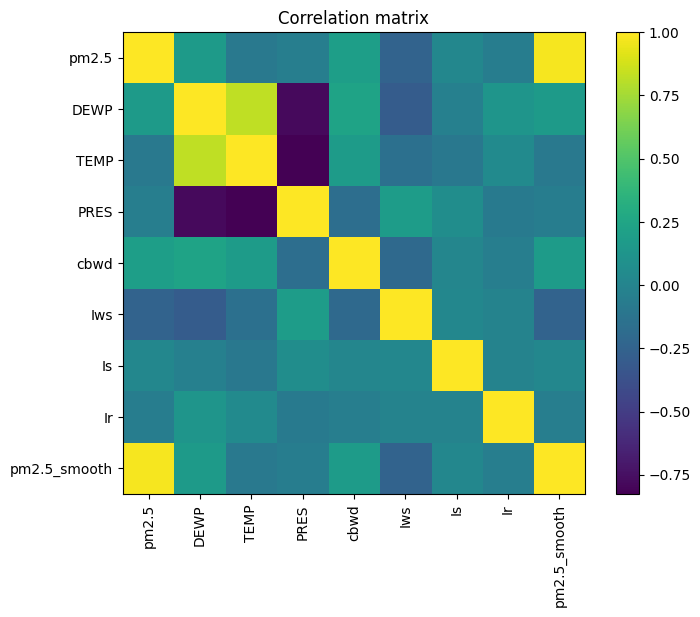

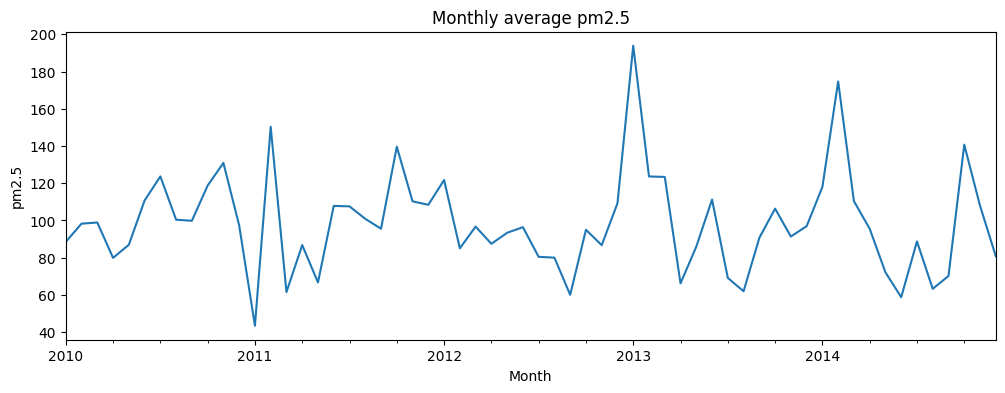

In [3]:
import matplotlib.pyplot as plt

# Overview of dataset
print("Shape:", df.shape)
print(df.info())
print(df.describe())

# Plot pm2.5 over time
plt.figure(figsize=(12,4))
df["pm2.5"].plot()
plt.title("pm2.5 over time")
plt.xlabel("Datetime")
plt.ylabel("pm2.5")
plt.show()

# Plot temperature over time
plt.figure(figsize=(12,4))
df["TEMP"].plot()
plt.title("Temperature over time")
plt.xlabel("Datetime")
plt.ylabel("Temperature")
plt.show()

# Distribution of pm2.5
plt.figure(figsize=(6,4))
df["pm2.5"].hist(bins=50)
plt.title("pm2.5 distribution")
plt.xlabel("pm2.5")
plt.ylabel("Frequency")
plt.show()

# Scatter plot pm2.5 vs TEMP
plt.figure(figsize=(6,4))
plt.scatter(df["TEMP"], df["pm2.5"], s=5)
plt.title("pm2.5 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("pm2.5")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
plt.imshow(df.corr(), interpolation="nearest")
plt.title("Correlation matrix")
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

# Seasonality check by monthly average
monthly_mean = df["pm2.5"].resample("M").mean()
plt.figure(figsize=(12,4))
monthly_mean.plot()
plt.title("Monthly average pm2.5")
plt.xlabel("Month")
plt.ylabel("pm2.5")
plt.show()

# Deep Learning Models

# Long Short-Term Memory (LSTM)

Epoch 1/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 2/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 9.3590e-04 - val_loss: 6.2405e-04
Epoch 3/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.1185e-04 - val_loss: 5.1987e-04
Epoch 4/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 6.7276e-04 - val_loss: 4.9955e-04
Epoch 5/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 6.6729e-04 - val_loss: 4.8845e-04
Epoch 6/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 6.6056e-04 - val_loss: 4.7655e-04
Epoch 7/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 6.5259e-04 - val_loss: 4.6895e-04
Epoch 8/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 6.4573e-04 - val_loss: 4.6500e-04
Epoch 9/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 6.4007e-04 - val_loss: 4.6165e-04
Epoch 10/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 6.3454e-04 - val_loss: 4.5715e-04
Epoch 11/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 21s 12

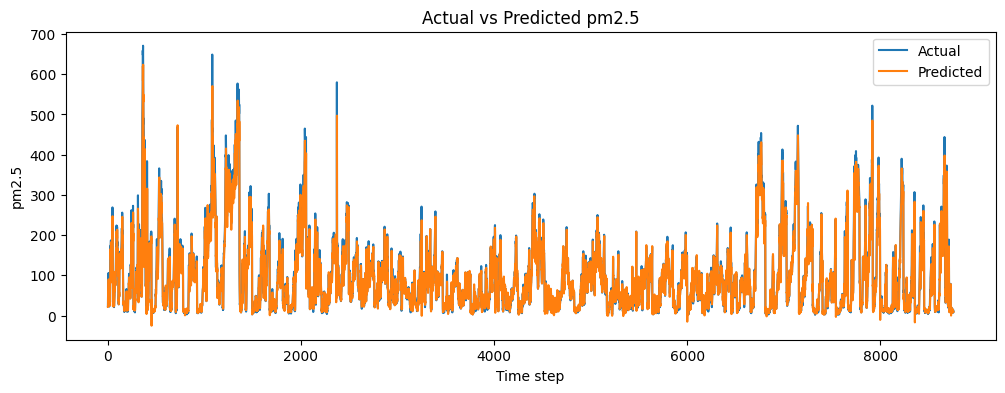

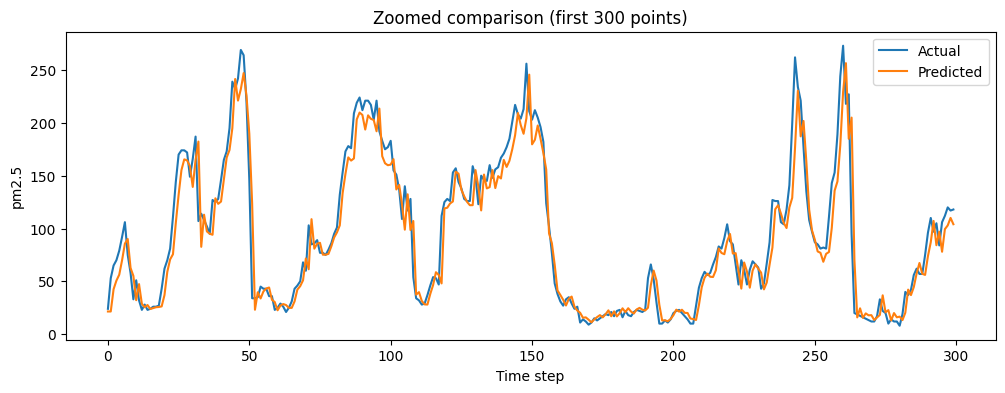

In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

def create_sequences(data, seq_len):
    X_list = []
    y_list = []
    for i in range(seq_len, len(data)):
        X_list.append(data[i - seq_len:i])
        y_list.append(data[i][0])
    return np.array(X_list), np.array(y_list)

sequence_length = 24

X, y = create_sequences(scaled, sequence_length)

split = int(len(X) * 0.8)

X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, X.shape[2])))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

# Predictions
y_pred = model.predict(X_test)

# Inverse scaling
full_pred = np.zeros((len(y_pred), scaled.shape[1]))
full_pred[:, 0] = y_pred[:, 0]
inv = scaler.inverse_transform(full_pred)
y_pred_real = inv[:, 0]

# Actual inverse scaled values
full_real = np.zeros((len(y_test), scaled.shape[1]))
full_real[:, 0] = y_test
inv_real = scaler.inverse_transform(full_real)[:, 0]

# Structured prediction table
comparison_df = pd.DataFrame({
    "Actual_pm2.5": inv_real[:20],
    "Predicted_pm2.5": y_pred_real[:20]
})

print("Prediction table:")
print(comparison_df)

# Metrics
mse = mean_squared_error(inv_real, y_pred_real)
rmse = mse ** 0.5
mae = mean_absolute_error(inv_real, y_pred_real)
r2 = r2_score(inv_real, y_pred_real)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

# Plot 1: Full range actual vs predicted
plt.figure(figsize=(12,4))
plt.plot(inv_real, label="Actual")
plt.plot(y_pred_real, label="Predicted")
plt.title("Actual vs Predicted pm2.5")
plt.xlabel("Time step")
plt.ylabel("pm2.5")
plt.legend()
plt.show()

# Plot 2: First 300 samples zoom
plt.figure(figsize=(12,4))
plt.plot(inv_real[:300], label="Actual")
plt.plot(y_pred_real[:300], label="Predicted")
plt.title("Zoomed comparison (first 300 points)")
plt.xlabel("Time step")
plt.ylabel("pm2.5")
plt.legend()
plt.show()

# Gated Recurrent Unit (GRU)

Epoch 1/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0038 - val_loss: 5.1379e-04
Epoch 2/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 7.8207e-04 - val_loss: 4.5098e-04
Epoch 3/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 6.9791e-04 - val_loss: 4.3838e-04
Epoch 4/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 6.9176e-04 - val_loss: 4.4700e-04
Epoch 5/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 6.8823e-04 - val_loss: 4.5790e-04
Epoch 6/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 6.7937e-04 - val_loss: 4.6355e-04
Epoch 7/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 6.7071e-04 - val_loss: 4.6551e-04
Epoch 8/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 6.6462e-04 - val_loss: 4.6570e-04
Epoch 9/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 6.5945e-04 - val_loss: 4.6519e-04
Epoch 10/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 6.5422e-04 - val_loss: 4.6289e-04
Epoch 11/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 20

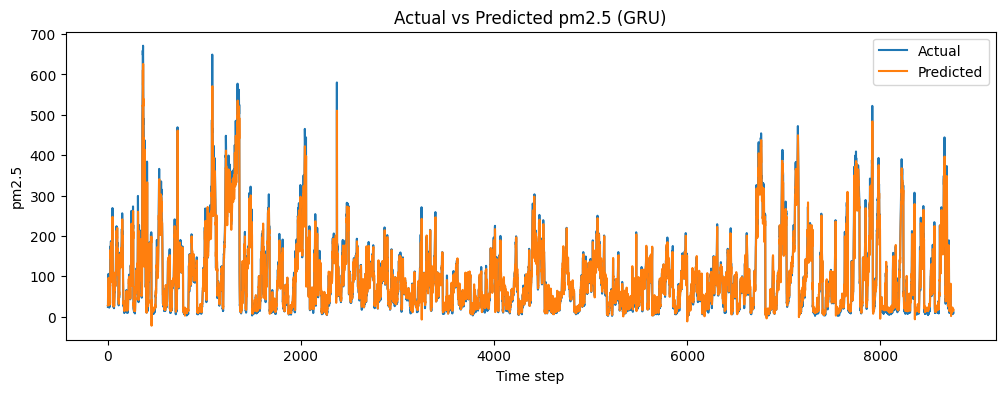

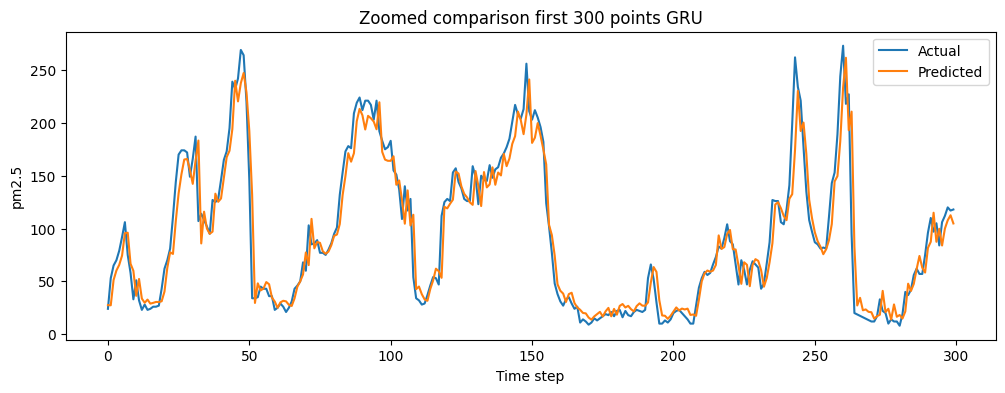

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

def create_sequences(data, seq_len):
    X_list = []
    y_list = []
    for i in range(seq_len, len(data)):
        X_list.append(data[i - seq_len:i])
        y_list.append(data[i][0])
    return np.array(X_list), np.array(y_list)

sequence_length = 24

X, y = create_sequences(scaled, sequence_length)

split = int(len(X) * 0.8)

X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# GRU model
model = Sequential()
model.add(GRU(64, input_shape=(sequence_length, X.shape[2])))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

# Predictions
y_pred = model.predict(X_test)

# Inverse scaling of predictions
full_pred = np.zeros((len(y_pred), scaled.shape[1]))
full_pred[:, 0] = y_pred[:, 0]
inv_pred = scaler.inverse_transform(full_pred)
y_pred_real = inv_pred[:, 0]

# Inverse scaling of actual values
full_real = np.zeros((len(y_test), scaled.shape[1]))
full_real[:, 0] = y_test
inv_real = scaler.inverse_transform(full_real)[:, 0]

print(y_pred_real[:10])

# Structured prediction table
comparison_df = pd.DataFrame({
    "Actual_pm2.5": inv_real[:20],
    "Predicted_pm2.5": y_pred_real[:20]
})

print("Structured prediction preview:")
print(comparison_df)

# Metrics
mse = mean_squared_error(inv_real, y_pred_real)
rmse = mse ** 0.5
mae = mean_absolute_error(inv_real, y_pred_real)
r2 = r2_score(inv_real, y_pred_real)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

# Plot 1: Actual vs Predicted full range
plt.figure(figsize=(12,4))
plt.plot(inv_real, label="Actual")
plt.plot(y_pred_real, label="Predicted")
plt.title("Actual vs Predicted pm2.5 (GRU)")
plt.xlabel("Time step")
plt.ylabel("pm2.5")
plt.legend()
plt.show()

# Plot 2: Zoomed first 300 points
plt.figure(figsize=(12,4))
plt.plot(inv_real[:300], label="Actual")
plt.plot(y_pred_real[:300], label="Predicted")
plt.title("Zoomed comparison first 300 points GRU")
plt.xlabel("Time step")
plt.ylabel("pm2.5")
plt.legend()
plt.show()

# Model Comparison

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM RMSE: 23.032795495882805
GRU RMSE: 23.573349157727243
LSTM MAE: 13.428027838835005
GRU MAE: 13.826824840388172


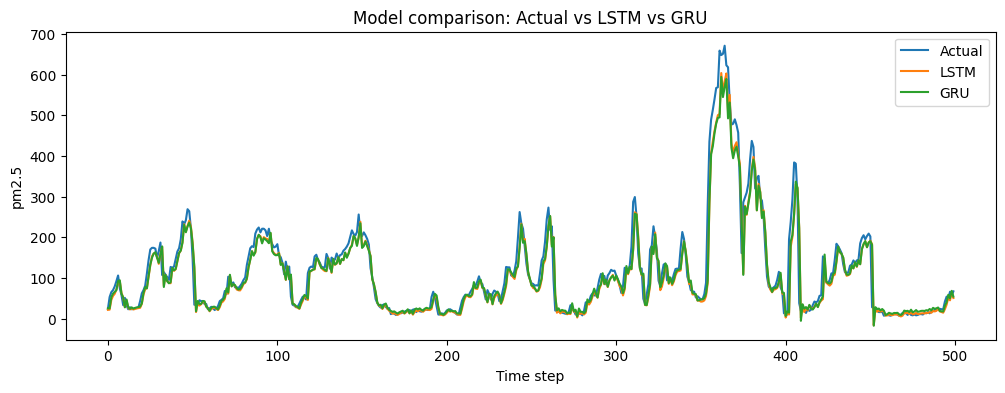

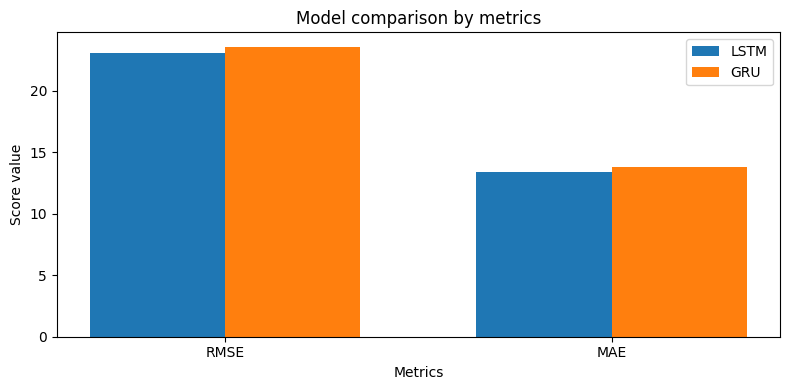

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

def build_gru(input_shape):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

lstm_model = build_lstm((sequence_length, X.shape[2]))
gru_model = build_gru((sequence_length, X.shape[2]))

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, shuffle=False, verbose=0)
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, shuffle=False, verbose=0)

y_lstm = lstm_model.predict(X_test)
y_gru = gru_model.predict(X_test)

full_lstm = np.zeros((len(y_lstm), scaled.shape[1]))
full_gru = np.zeros((len(y_gru), scaled.shape[1]))

full_lstm[:, 0] = y_lstm[:, 0]
full_gru[:, 0] = y_gru[:, 0]

inv_lstm = scaler.inverse_transform(full_lstm)[:, 0]
inv_gru = scaler.inverse_transform(full_gru)[:, 0]

full_real = np.zeros((len(y_test), scaled.shape[1]))
full_real[:, 0] = y_test
inv_real = scaler.inverse_transform(full_real)[:, 0]

# Metrics (fixed RMSE)
mse_lstm = mean_squared_error(inv_real, inv_lstm)
rmse_lstm = mse_lstm ** 0.5

mse_gru = mean_squared_error(inv_real, inv_gru)
rmse_gru = mse_gru ** 0.5

mae_lstm = mean_absolute_error(inv_real, inv_lstm)
mae_gru = mean_absolute_error(inv_real, inv_gru)

print("LSTM RMSE:", rmse_lstm)
print("GRU RMSE:", rmse_gru)
print("LSTM MAE:", mae_lstm)
print("GRU MAE:", mae_gru)

plt.figure(figsize=(12,4))
plt.plot(inv_real[:500], label="Actual")
plt.plot(inv_lstm[:500], label="LSTM")
plt.plot(inv_gru[:500], label="GRU")
plt.title("Model comparison: Actual vs LSTM vs GRU")
plt.xlabel("Time step")
plt.ylabel("pm2.5")
plt.legend()
plt.show()

metrics = ["RMSE", "MAE"]
lstm_scores = [rmse_lstm, mae_lstm]
gru_scores = [rmse_gru, mae_gru]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,4))

plt.bar(x - width/2, lstm_scores, width, label="LSTM")
plt.bar(x + width/2, gru_scores, width, label="GRU")

plt.xlabel("Metrics")
plt.ylabel("Score value")
plt.title("Model comparison by metrics")
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()